In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_excel("/content/sample_data/cleaned_josaa_data.xlsx")

# Check basic information
print(df.info())

# Display first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82728 entries, 0 to 82727
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   82728 non-null  int64  
 1   round                  82728 non-null  int64  
 2   institute              82728 non-null  object 
 3   academic_program_name  82728 non-null  object 
 4   quota                  82728 non-null  object 
 5   seat_type              82728 non-null  object 
 6   gender                 82728 non-null  object 
 7   opening_rank           82728 non-null  float64
 8   closing_rank           82728 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 5.7+ MB
None
   year  round                                   institute  \
0  2023      6  Indian Institute of Technology Bhubaneswar   
1  2023      6  Indian Institute of Technology Bhubaneswar   
2  2023      6  Indian Institute of Technology Bhubaneswar   
3  20

In [27]:
# Add a new column (Example: Adding a column named 'NewColumn' with default value 0)
df['admission_status'] = 'not admitted'  # You can replace 0 with any default value or computed value

# Save the updated DataFrame back to Excel
df.to_excel("/content/sample_data/cleaned_josaa_data.xlsx", index=False)

year                     0
round                    0
institute                0
academic_program_name    0
quota                    0
seat_type                0
gender                   0
opening_rank             0
closing_rank             0
admission_status         0
dtype: int64


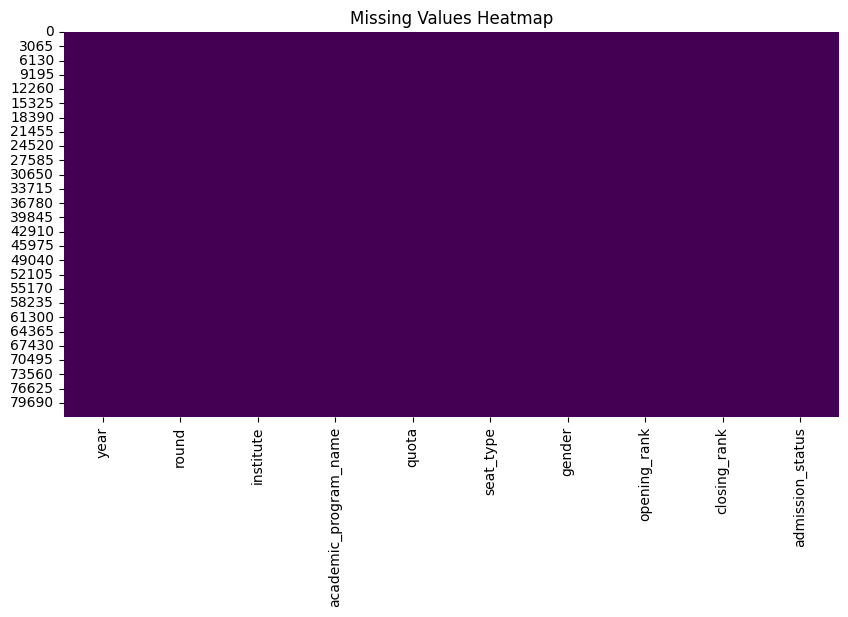

In [28]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

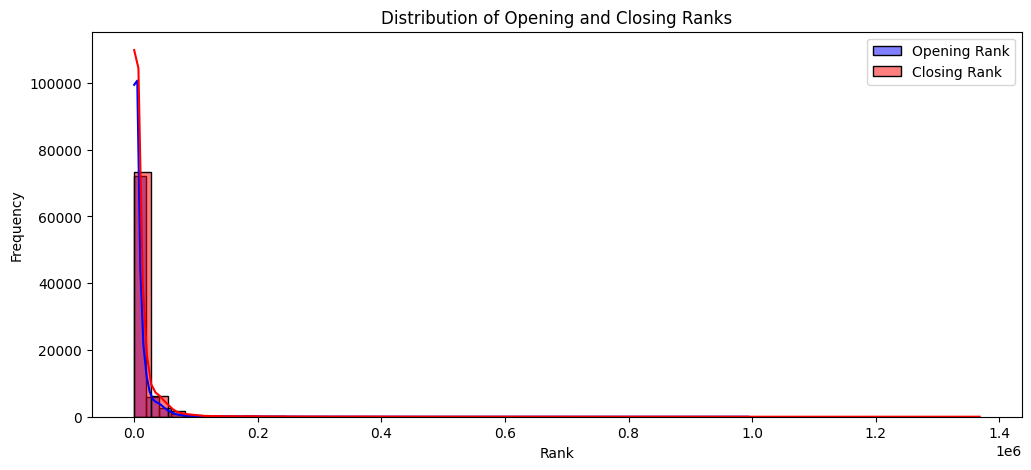

In [29]:
# Plot distribution of Opening & Closing Ranks
plt.figure(figsize=(12, 5))
sns.histplot(df["opening_rank"], bins=50, kde=True, color="blue", label="Opening Rank")
sns.histplot(df["closing_rank"], bins=50, kde=True, color="red", label="Closing Rank")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Distribution of Opening and Closing Ranks")
plt.legend()
plt.show()

<ipython-input-30-53496e42bf7e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_institutes.index, y=top_institutes.values, palette="coolwarm")


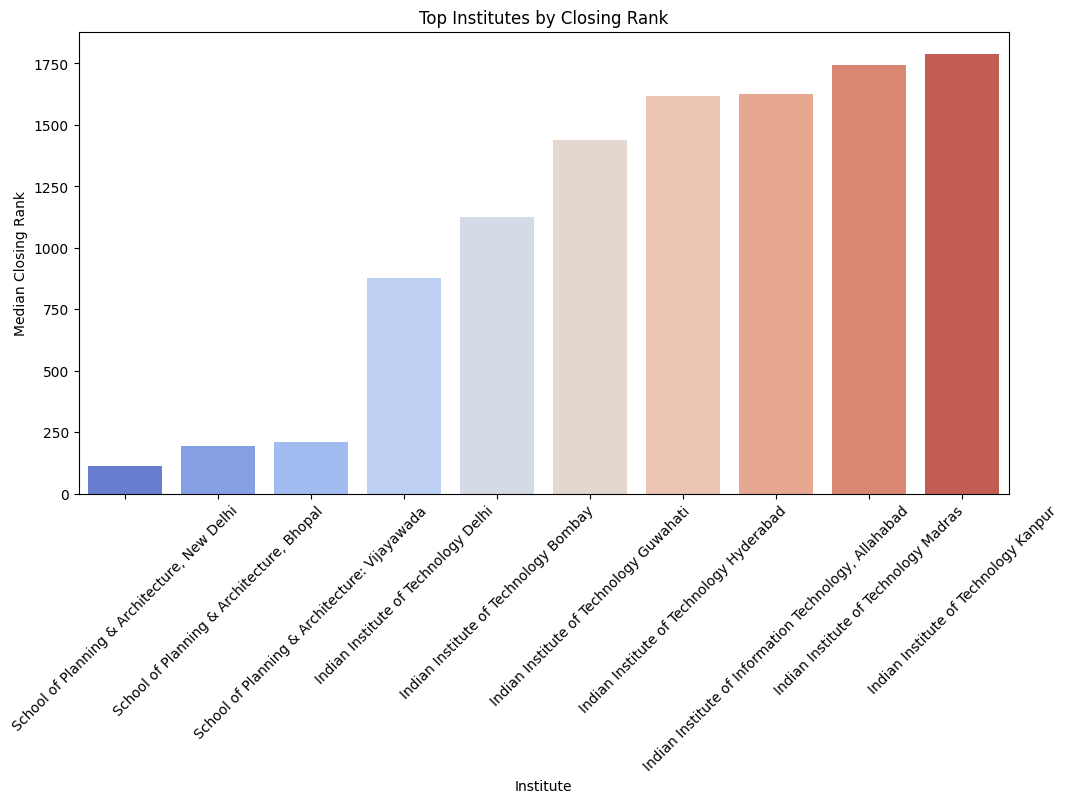

In [30]:
# Find top institutes with the lowest closing ranks (high competition)
top_institutes = df.groupby("institute")["closing_rank"].median().sort_values().head(10)

# Plot top institutes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_institutes.index, y=top_institutes.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Institute")
plt.ylabel("Median Closing Rank")
plt.title("Top Institutes by Closing Rank")
plt.show()

<ipython-input-31-02f9536861f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_branches.index, y=top_branches.values, palette="magma")


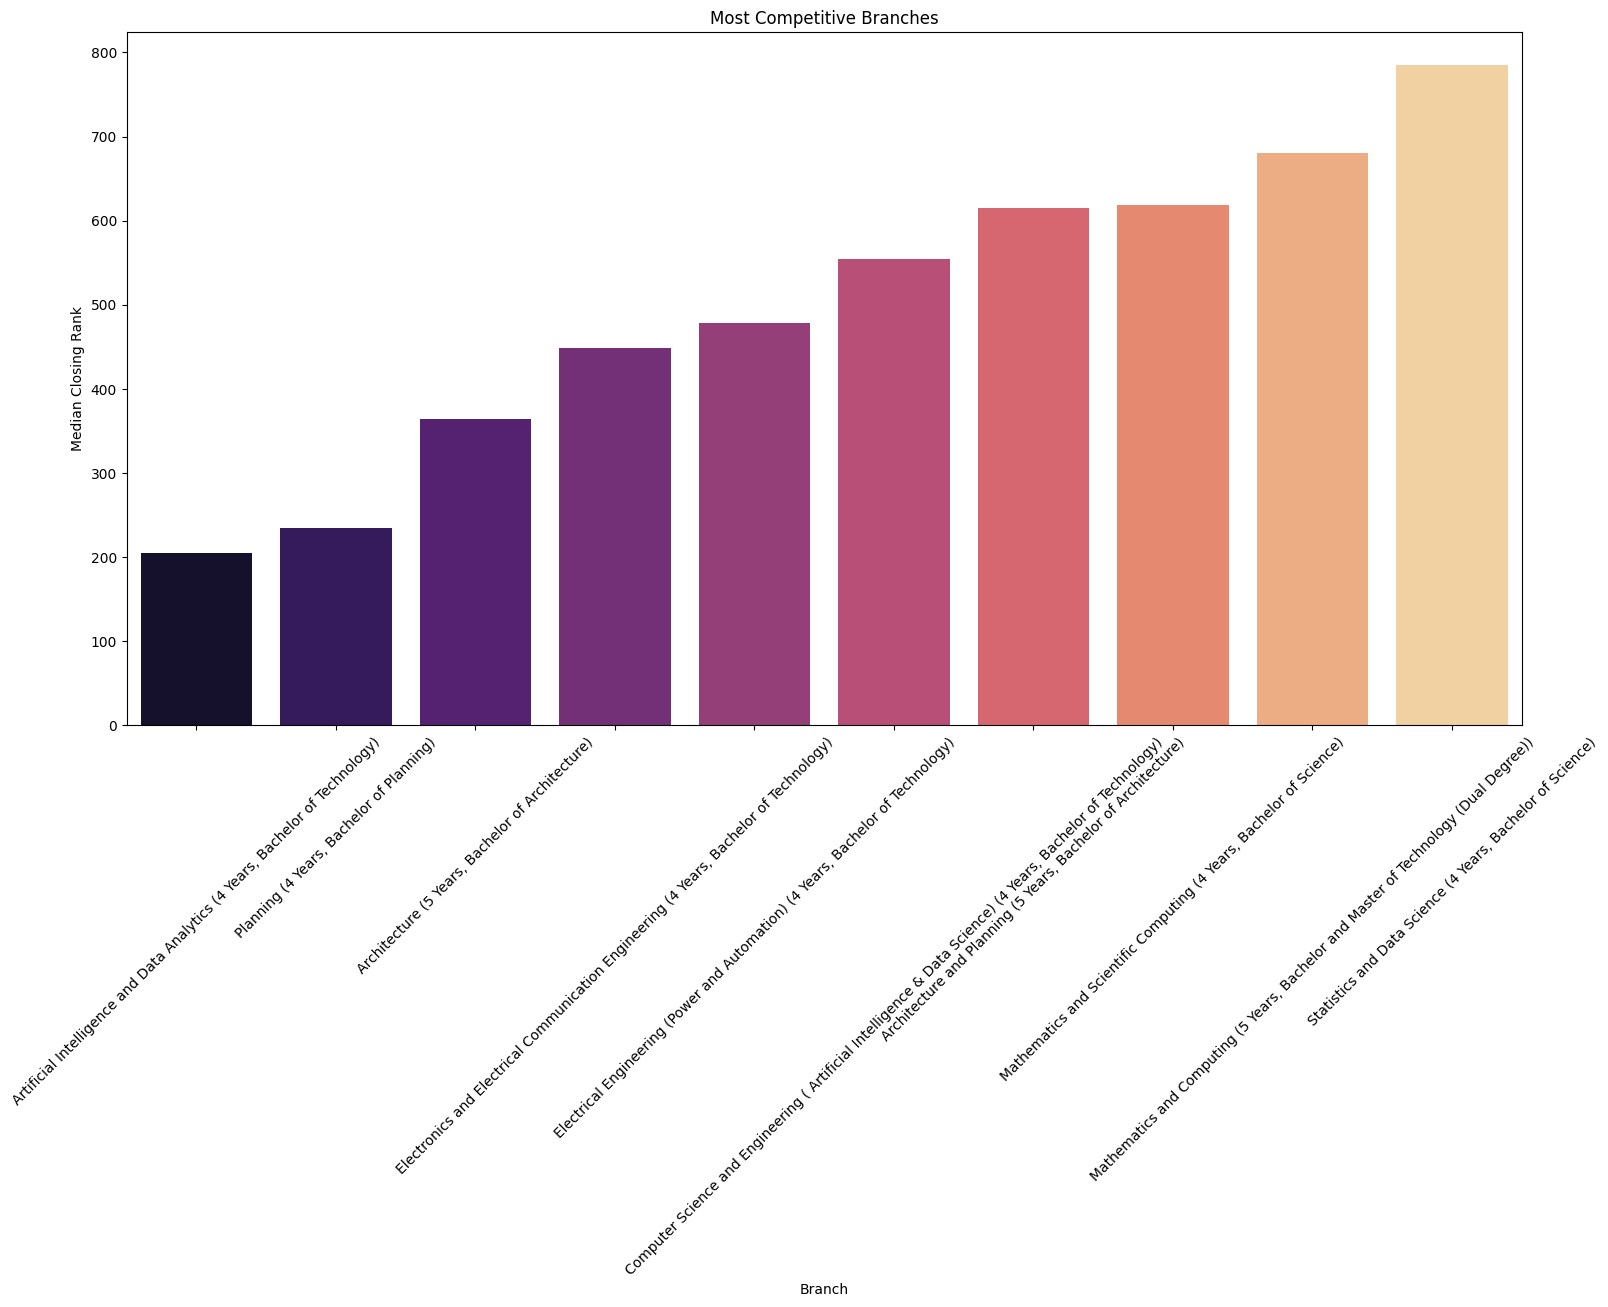

In [31]:
# Find top branches with lowest closing ranks
top_branches = df.groupby("academic_program_name")["closing_rank"].median().sort_values().head(10)

# Plot
plt.figure(figsize=(18, 9))
sns.barplot(x=top_branches.index, y=top_branches.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Branch")
plt.ylabel("Median Closing Rank")
plt.title("Most Competitive Branches")
plt.show()

<ipython-input-32-757a906bda63>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="year", y="closing_rank", hue="institute", ci=None)


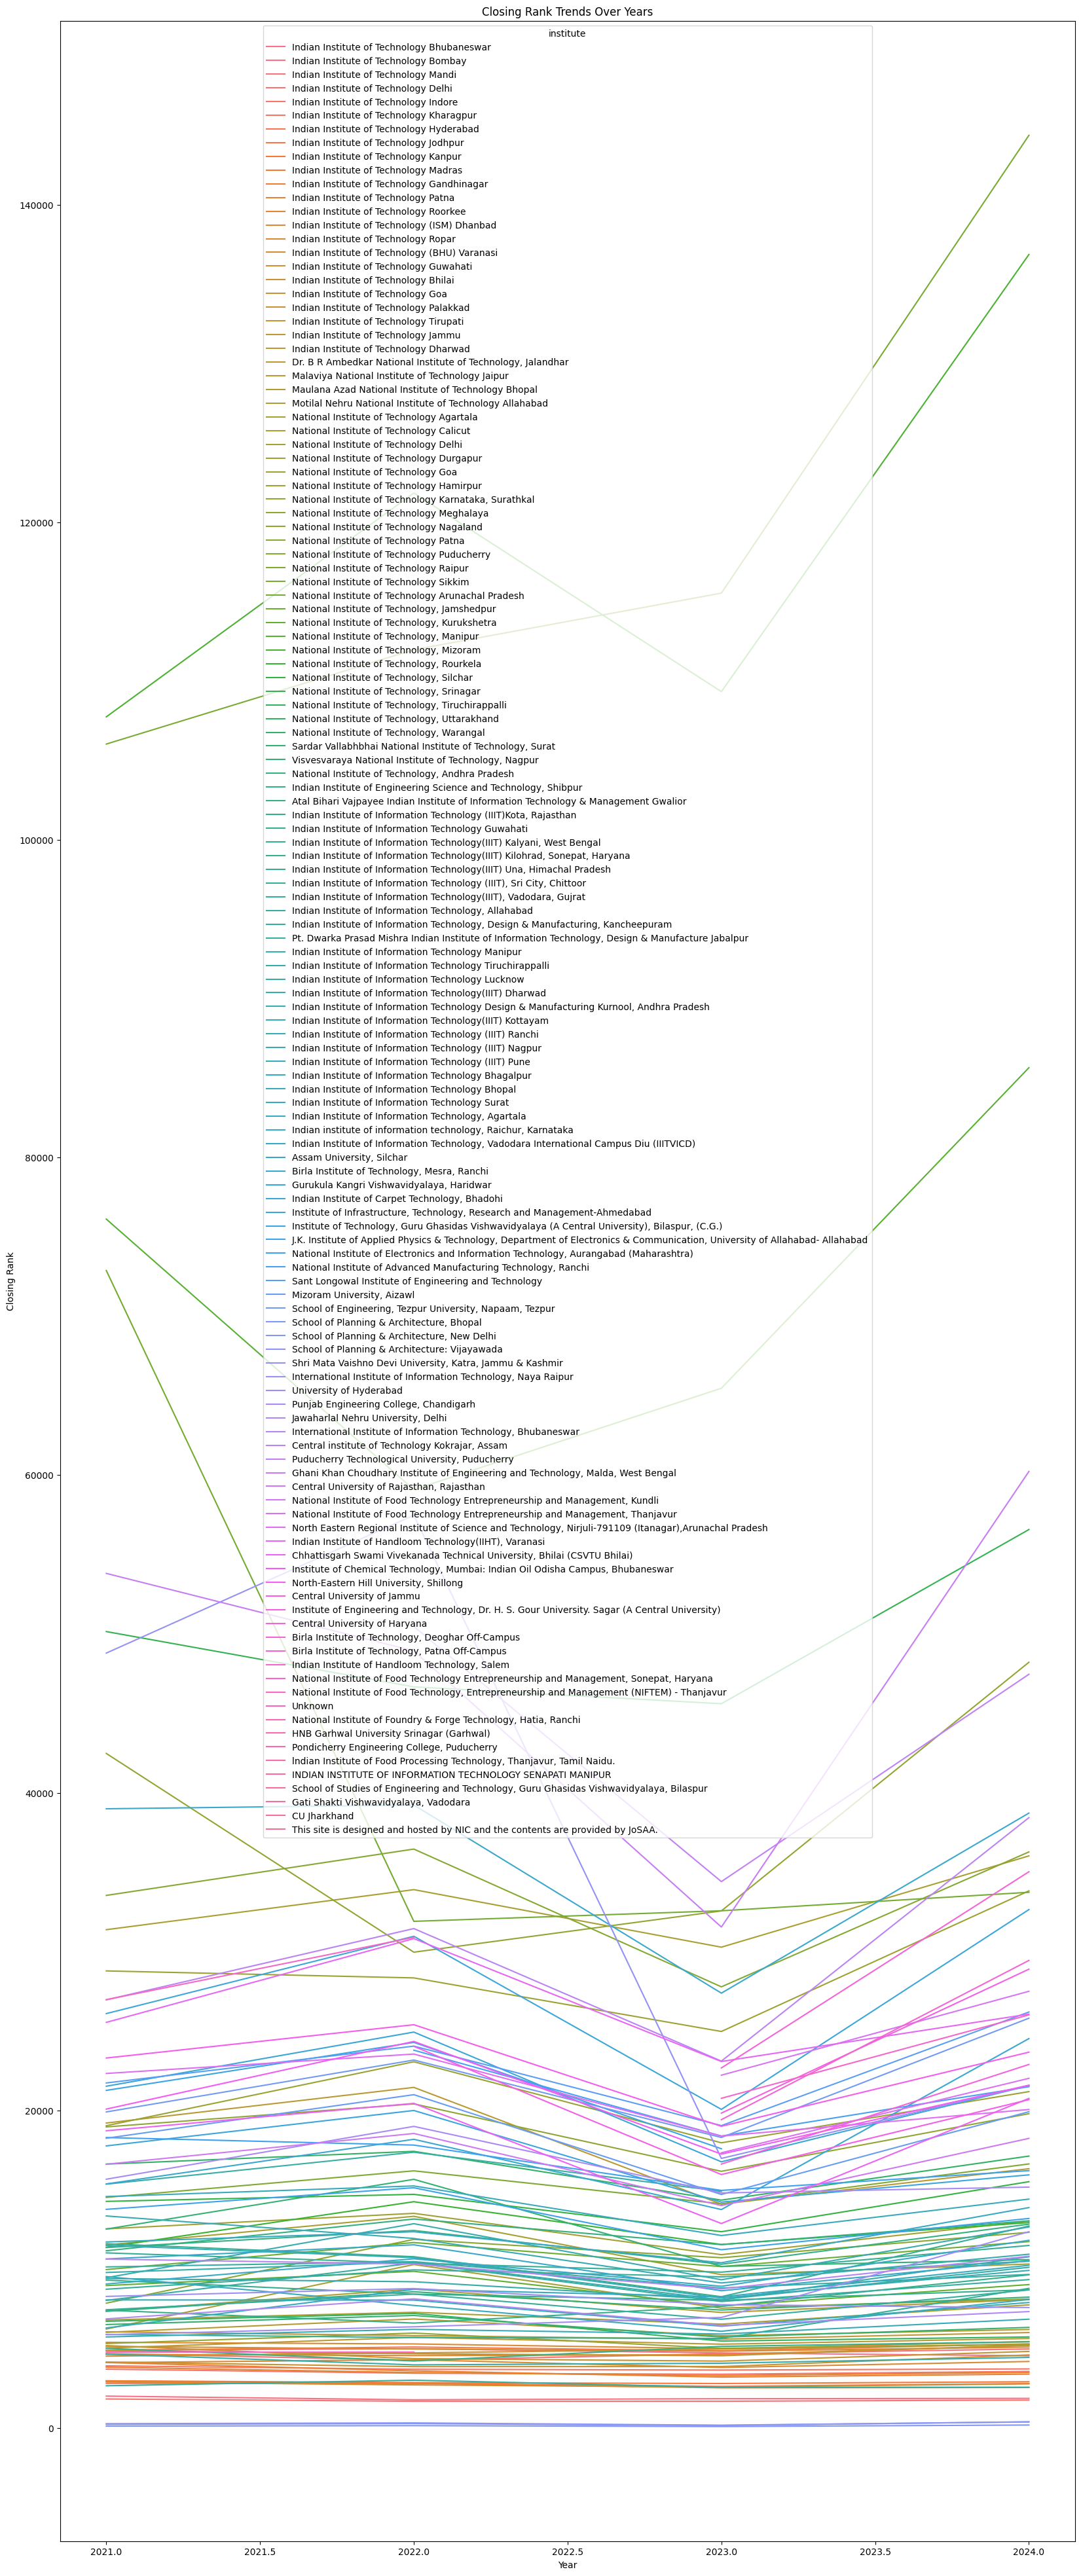

In [32]:
plt.figure(figsize=(20,50))
sns.lineplot(data=df, x="year", y="closing_rank", hue="institute", ci=None)
plt.xlabel("Year")
plt.ylabel("Closing Rank")
plt.title("Closing Rank Trends Over Years")
plt.show()

<ipython-input-33-3459b7b2fb98>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="quota", palette="Set2")


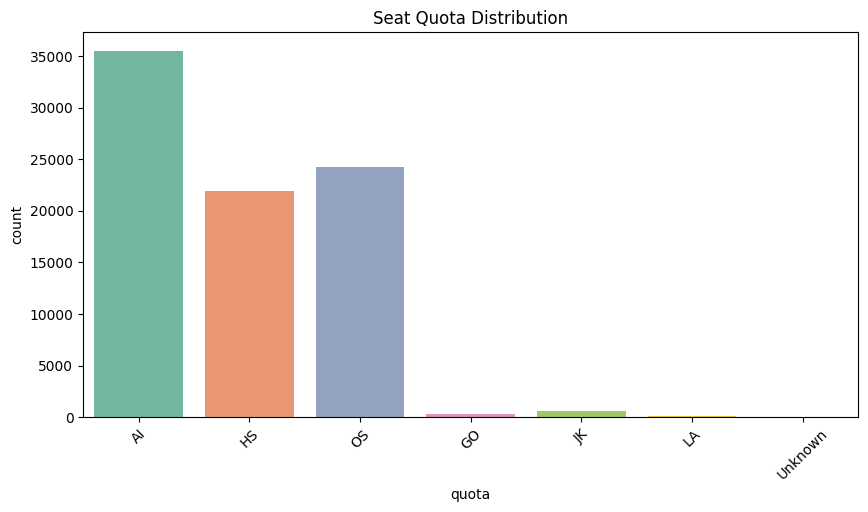

In [33]:
# Quota distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="quota", palette="Set2")
plt.xticks(rotation=45)
plt.title("Seat Quota Distribution")
plt.show()

<ipython-input-34-0c6b7a24fe53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="gender", palette="coolwarm")


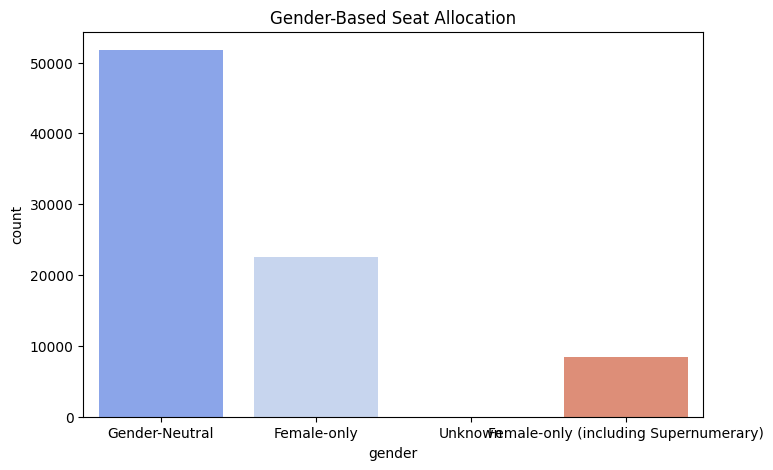

In [34]:
# Gender-based seat allocation
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="gender", palette="coolwarm")
plt.title("Gender-Based Seat Allocation")
plt.show()

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset (Replace 'your_dataframe' with actual DataFrame)
df1 = df.copy()

# Create target variable 'admission_status' based on closing_rank threshold (example: top 5000 ranks get admission)
rank_threshold = 5000  # Adjust based on data analysis
df1['admission_status'] = (df1['closing_rank'] <= rank_threshold).astype(int)

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Can be 'median', 'most_frequent', or 'constant'
numeric_cols = df1.select_dtypes(include=['number']).columns
# Exclude 'admission_status' from numeric_cols to avoid scaling it
numeric_cols = numeric_cols.drop('admission_status', errors='ignore')
df1[numeric_cols] = imputer.fit_transform(df1[numeric_cols])

# Encode categorical variables
categorical_cols = ['institute', 'academic_program_name', 'quota', 'seat_type', 'gender']
for col in categorical_cols:
    if df1[col].nunique() <= 10:  # One-hot encoding for low cardinality
        df1 = pd.get_dummies(df1, columns=[col], drop_first=True) # Changed df to df1
    else:  # Label encoding for high cardinality
        df1[col] = LabelEncoder().fit_transform(df1[col]) # Changed df to df1

# Feature scaling
scaler = StandardScaler()  # Use MinMaxScaler() if needed
df1[numeric_cols] = scaler.fit_transform(df1[numeric_cols])

# Feature selection
X = df1.drop(columns=['admission_status'])
y = df1['admission_status']
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 best features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Creating new feature dataframe
df12 = pd.DataFrame(X_new, columns=selected_features)
df12['admission_status'] = y

# Final feature-engineered dataset
print("Feature Engineering Completed. Selected Features:")
print(selected_features)

Feature Engineering Completed. Selected Features:
Index(['institute', 'academic_program_name', 'seat_type', 'opening_rank',
       'closing_rank', 'quota_GO', 'quota_HS', 'quota_JK',
       'gender_Female-only (including Supernumerary)',
       'gender_Gender-Neutral'],
      dtype='object')


In [37]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df12.drop(columns=['admission_status'])
y = df12['admission_status']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9721382811555663
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7972
           1       0.97      0.98      0.97      8574

    accuracy                           0.97     16546
   macro avg       0.97      0.97      0.97     16546
weighted avg       0.97      0.97      0.97     16546



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7972
           1       1.00      1.00      1.00      8574

    accuracy                           1.00     16546
   macro avg       1.00      1.00      1.00     16546
weighted avg       1.00      1.00      1.00     16546



In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 1.0
